In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
dataset_url = "https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv"
df = pd.read_csv(dataset_url)
print("Initial dataset head:")
print(df.head())

Initial dataset head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


 # 1
 The goal is to predict whether a patient has heart disease (binary outcome) using various clinical and demographic features

# 2
Scaling using standard Scaler

In [3]:
from sklearn.preprocessing import StandardScaler
# checking missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())

# Feature Scaling
# Identify numeric feature columns (excluding the target 'num')
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'num' in numeric_features:
    numeric_features.remove('num')

print("\nNumeric Feature Columns:")
print(numeric_features)

# Apply Standard Scaling to numeric features
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nDataset after Scaling (first 5 rows):")
print(df.head())



Missing Values in Each Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Numeric Feature Columns:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Dataset after Scaling (first 5 rows):
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.948726  0.686202 -2.251775  0.757525 -0.264900  2.394438  1.016684   
1  1.392002  0.686202  0.877985  1.611220  0.760415 -0.417635  1.016684   
2  1.392002  0.686202  0.877985 -0.665300 -0.342283 -0.417635  1.016684   
3 -1.932564  0.686202 -0.165268 -0.096170  0.063974 -0.417635 -0.996749   
4 -1.489288 -1.457296 -1.208521 -0.096170 -0.825922 -0.417635  1.016684   

    thalach     exang   oldpeak     slope        ca      thal  num  
0  0.017197 -0.696631  1.087338  2.274579 -0.718306  0.653650

# 3

In [4]:
# 3
print("\n--- Dataset Information ---")
print(df.info())
print("\n--- Statistical Summary ---")
print(df.describe())


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

--- Statistical Summary ---
                age           sex            cp      trestbps          chol  \
count  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  3.030000e+02  

# Three descriptive statements:
The dataset consists of clinical and demographic variables (e.g., age, sex, chest pain type, blood pressure, cholesterol) that are typical in a heart disease dataset.
The continuous variables stored as float64 (such as age, trestbps, chol, and thalach) show a broad range and their distributions may be normal or slightly skewed.
The dataset initially contains 14 variables and 303 observations.

# 4

In [6]:
# 4
df['num'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
print("\nValue counts for transformed binary target 'num':")
print(df['num'].value_counts())


Value counts for transformed binary target 'num':
num
0    164
1    139
Name: count, dtype: int64


# 5


Correlation matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.362605  0.093185  0.233214  0.098773  0.119000  0.145478   
thal      0.127389  0.380936  0.265246  0.1

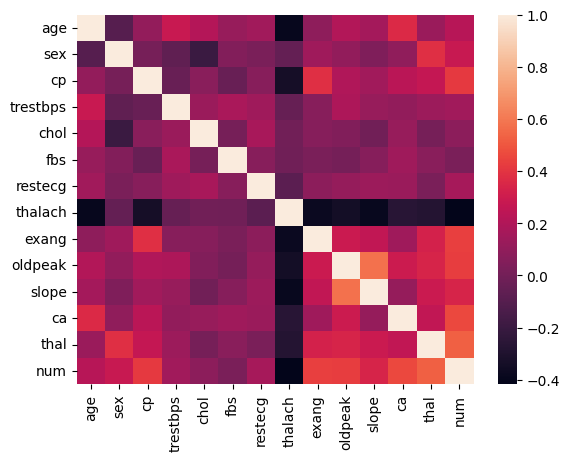

In [7]:
# 5(need further explaining)
corr_matrix = df.corr()
print("\nCorrelation matrix:")
sns.heatmap(corr_matrix)
print(corr_matrix)

Thalach is highly negatively correlated with our target variable, heart disease, as well as with several other variables: ca, slope, oldpeak, exang, and thal. Therefore, for feature selection, thalach contains redundant information and is not essential.

# 6

In [8]:
# 6
df_clean = df.dropna()
print("\nNumber of observations after dropping missing values:", df_clean.shape[0])


Number of observations after dropping missing values: 297


# 7

In [9]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'num' in numeric_cols:
    numeric_cols.remove('num')
print("\nContinuous variables used for subgroup analysis:", numeric_cols)


Continuous variables used for subgroup analysis: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=1)
pca_results = pca.fit_transform(df_clean[numeric_cols])

df_clean.loc[:, 'pca1'] = pca_results[:, 0]
df_clean.loc[:, 'pca2'] = pca_results[:, 1]

C:\Users\tevir\AppData\Local\Temp\ipykernel_23848\371919826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'pca1'] = pca_results[:, 0]
C:\Users\tevir\AppData\Local\Temp\ipykernel_23848\371919826.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'pca2'] = pca_results[:, 1]


In [11]:
kmeans = KMeans(n_clusters=3, random_state=1)
df_clean.loc[:, 'cluster'] = kmeans.fit_predict(df_clean[numeric_cols])

C:\Users\tevir\AppData\Local\Temp\ipykernel_23848\2203248161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'cluster'] = kmeans.fit_predict(df_clean[numeric_cols])


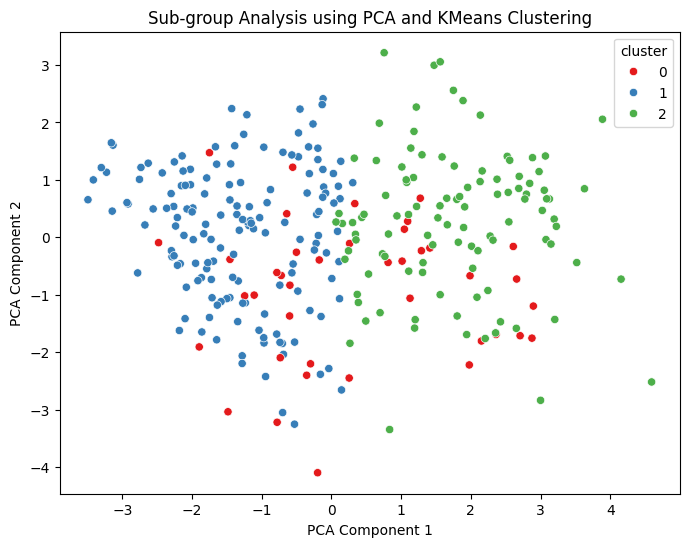

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_clean, palette='Set1')
plt.title('Sub-group Analysis using PCA and KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Visually, the map appears to have one island and so sub-groups were not identified by this analysis. 

# 8

In [13]:
# 8
# Prepare the features and target variables while excluding the additional subgroup columns.
features = df_clean.drop(columns=['num', 'cluster', 'pca1', 'pca2'])
target = df_clean['num']

# Split the data using 30% for testing and 70% for training (random seed = 1).
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)
print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 207
Test set size: 90


# 9 
A logistic regression classifier and a random forest classifier will be used.

# 10 
A metric will be classification accuracy, using accuracy_score(). Another metric will be f1 score, using f1_score(). 

# 11

In [14]:
# 11

m_log = LogisticRegression(max_iter=120)

m_log.fit(X_train, y_train)
pred_prob = m_log.predict_proba(X_test)

m_log_pred = m_log.predict(X_test)
accuracy_score(y_test, m_log_pred) #the default probability cutoff in scikit is 0.5

0.8

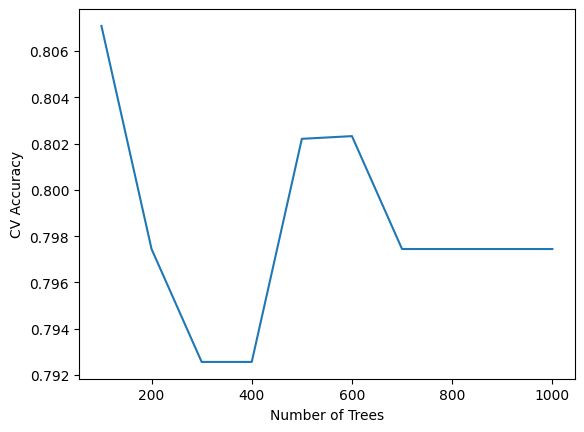

In [18]:
from sklearn.model_selection import cross_val_score

heart_scores_cv = []
ntrees = range(100, 1100, 100)
for n in ntrees:
    scores = cross_val_score(
        RandomForestClassifier(n_estimators=n, max_features=13, random_state=0, bootstrap=True, oob_score=True, criterion='gini'), 
        X_train, 
        y_train, 
        cv=5,
        scoring='accuracy'
    )
    heart_scores_cv.append(scores.mean())

plt.plot(ntrees, heart_scores_cv)
plt.xlabel('Number of Trees')
plt.ylabel('CV Accuracy')
plt.show()

CV accuracy peaks with 400 trees.

# 12 

In [ ]:
selector = SelectKBest (score_func=chi2, k='all')
X_train_selected = selector.fit_transform(X_train, y_train) 
X_test_selected = selector.transform(X_test)

grid_m_log_fs = GridSearchCV(m_log, m_log_pred, cv=5, scoring='accuracy') 
grid_m_log_fs.fit(X_train_selected, y_train)
print("Best parameters for Logistic Classifier with feature selection:", grid_m_log_fs.best_estimator_)

ValueError: Input X must be non-negative.

# 13

The logistic regression model has 80% accuracy based on m_log_predict. The random forest has 80% CV accuracy. These models could be useful in clinical contexts for predicting who will develop heart disease. 

In [ ]:
best_kmeans = grid_kmeans.best_estimator_ 
best_m_log = grid_m_log.best_estimator_ 
best_m_log_fs = grid_m_log_fs.best_estimator_
# Get predictions on the test set.
y_pred_m_log = y_pred_kmeans
y_pred_m_log_fs = best_kmeans.predict(X_test)
best_m_log.predict(X_test) = best_m_log_fs.predict(X_test_selected)
# Compute evaluation metrics.
accuracy_kmeans = accuracy_score (y_test, y_pred_kmeans) 
f1_kmeans = f1_score (y_test, y_pred_kmeans)
accuracy_m_log = accuracy_score (y_test, y_pred_m_log) 
f1_m_log = f1_score (y_test, y_pred_m_log)
accuracy_m_log_fs = accuracy_score (y_test, y_pred_m_log_fs) 
f1_m_log_fs = f1_score (y_test, y_pred_m_log_fs)

# 14

# 16

Amanda did question 5, 9, 10, 11, 12, 13, 17. 
Delphine did question 1, 2, 3, 4, 6, 7, 8, 14. 

# 17

https://github.com/DelphineShen/Assignment6